# Evaluation Approaches

### Libraries

In [4]:
import numpy as np

## MRR

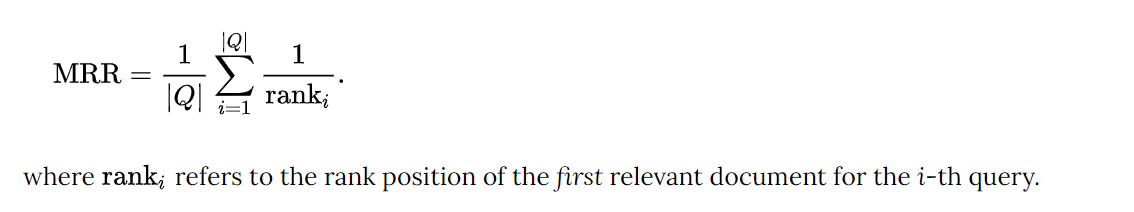

### Example

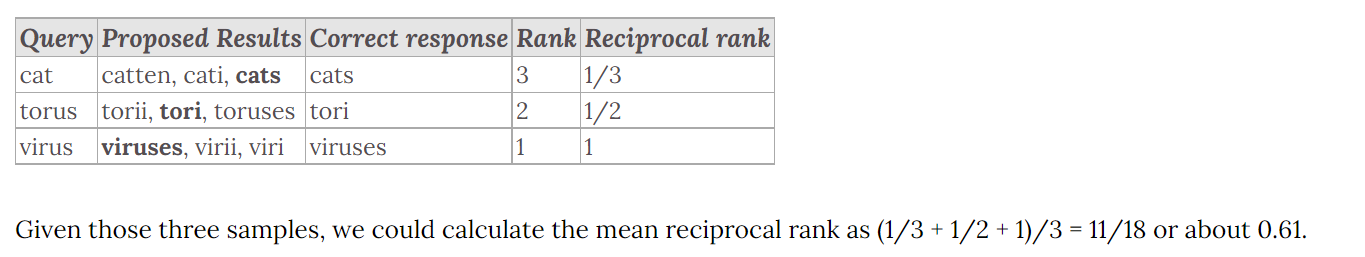

In [10]:
def mean_reciprocal_rank(rs):
    """
    Example from http://en.wikipedia.org/wiki/Mean_reciprocal_rank
    >>> rs = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    >>> mean_reciprocal_rank(rs)
        0.61111111111111105
    """
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])

## P@K

For modern (web-scale) information retrieval, recall is no longer a meaningful metric, as many queries have thousands of relevant documents, and few users will be interested in reading all of them. Precision at k documents (P@k) is still a useful metric (e.g., P@10 or "Precision at 10" corresponds to the number of relevant results among the top 10 retrieved documents), but fails to take into account the positions of the relevant documents among the top k. Another shortcoming is that on a query with fewer relevant results than k, even a perfect system will have a score less than 1. It is easier to score manually since only the top k results need to be examined to determine if they are relevant or not.

In [9]:
def precision_at_k(r, k):
    """
    >>> r = [0, 0, 1]
    >>> precision_at_k(r, 1)
    0.0
    >>> precision_at_k(r, 2)
    0.0
    >>> precision_at_k(r, 3)
    0.33333333333333331
    """
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)

## MAP 

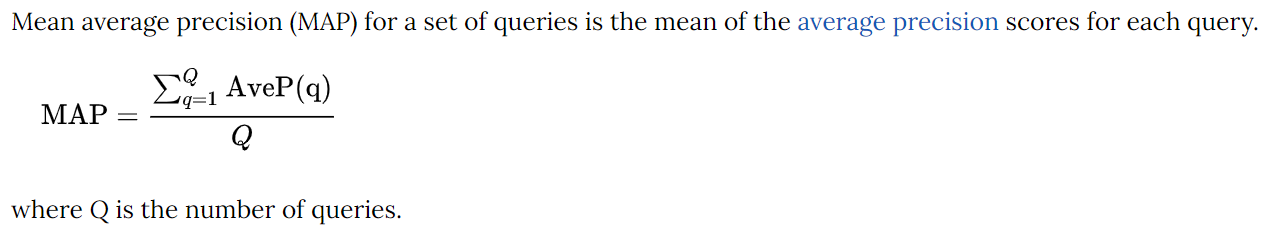

In [8]:
def mean_average_precision(rs):
    """
    >>> rs = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1]]
    >>> mean_average_precision(rs)
    0.78333333333333333
    """
    return np.mean([average_precision(r) for r in rs])